<a href="https://colab.research.google.com/github/AlbertoGhub/Testing_projects/blob/main/ALBERTO_Proyecto_M3_Modelado_Supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bootcamp Ciencia de Datos e Inteligencia Artificial 
## Proyecto del Módulo 3: Modelado supervisado en Machine Learning



¡Hola, qué gusto que estés a un paso de obtener tu insignia del módulo 3! Aquí pondrás en juego las habilidades y conocimientos que has practicado a lo largo de estas semanas.

Esta actividad constará de dos partes. Revisa con cuidado cada una de las instrucciones y procura plasmar todo tu potencial para que concluyas tu proyecto de manera exitosa. 

¡Éxito! 

## Objetivos
* Diseñarás y aplicarás un modelo de regresión lineal y un modelo de regresión logística en el que:
  - harás _dummies_ a valores categóricos,
  - «splitear» _dataframe_, 
  - estandarizarás conjuntos,  
  - entrenarás con conjunto de entrenamiento, 
  - predecirás con conjunto de pruebas.
* Aplicarás cuadros de confusión y medirás la precisión.
* Graficarás mapas de calor a partir del cuadro de confusión.
* Utilizarás métricas MSE, RMSE y R2.

## Primera parte

Descarga el archivo de la siguiente liga: https://drive.google.com/file/d/1mwbTl_m-r6oyKVl_ZHPOE4Io5tMohkr1/view?usp=sharing 

Un equipo de Recursos Humanos te acaba de proporcionar el archivo que has descargado. En este se indican algunas características que ellos creen que influyen en el salario que buscan algunas personas que se postulan en empresas de tecnología.

Este equipo pide de tu apoyo para diseñar un modelo que pueda predecir cuánto pedirá cada postulante con base en las siguientes características:

- `Experiencia`: Años de experiencia en el área.
- `Posición`: Posición que busca; existen tres opciones:
  - `Analista`
  - `Coordinador`
  - `Gerente`
- `Hijos`: Número de hijos que tiene.
- `Casado`: ¿El postulante está casado?
  - `0`: No
  - `1`: Sí
- `Educación`: ¿Cuál es el grado máximo de estudios concluido? Existen tres opciones:
  - `Bachillerato`
  - `Licenciatura`
  - `Posgrado`
- `Salario`: Cantidad en pesos mexicanos que pide. Esta variable es la que se pretende predecir en este ejercicio.

### Criterios de evaluación:
- Modelar regresión lineal correctamente (**2 puntos**):
  - hacer _dummies_ a valores categóricos,
  - generar train_test_split, 
  - estandarizar/reescalar conjuntos (solo si es necesario), 
  - entrenar con conjunto de entrenamiento, 
  - aplicar modelo, 
  - predecir con conjunto de pruebas.

> **Nota:** Si alguno de los 3 últimos puntos anteriores (aplicar modelo, entrenar con conjunto de entrenamiento y predecir con conjunto de pruebas) no es realizado se descontará **un punto**.

- Aplicar por lo menos una métricas (**2 puntos**):
  - **MSE**, 
  - **RMSE** o 
  - **R2**.


## Segunda parte

El equipo que te ha compartido la información te ha proporcionado un nuevo archivo, el cual puedes descargar de este *link*: https://drive.google.com/file/d/1qZsrAcB-02Z-8RA6wHzG2ZpJvYOFrTwp/view?usp=sharing

Es exactamente el mismo archivo de la **parte 1**, aunque ahora incluye una nueva columna, llamada `Contratado`, la cual tiene un `1` si el postulante fue contratado y un `0` si no lo fue.

En esta parte deberás hacer un modelo de clasificación que pueda predecir si un postulante será contrato o no, de acuerdo con las variables que te han compartido.

### Criterios de evaluación:
- Modelar la regresión logística correctamente (**2 puntos**):
  - hacer _dummies_ a valores categóricos,
  - «splitear» _dataframe_, 
  - estandarizar conjuntos, 
  - aplicar modelo, 
  - entrenar con conjunto de entrenamiento, 
  - predecir con conjunto de pruebas.

> **Nota:** Si falta alguno de los 3 puntos finales (aplicar modelo, entrenar con conjunto de entrenamiento y predecir con conjunto de pruebas) se descontará **un punto**.

- Aplicar cuadro de confusión y medir la precisión (**2 puntos**).
- Graficar un mapa de calor del cuadro de confusión (**2 puntos**).

> **Nota:** Las gráficas generadas deberán tener título y rótulos en sus ejes, de lo contrario, se descontará **un punto**.

> En el caso de las métricas, deberás indicar qué significan; puedes hacerlo a través de un comentario o imprimiéndolo directamente en pantalla.


# Step by step to follow:

1. Preprocesamiento:

  1.1. Importing data

  1.2. Showing the data with head() to see how our dataframe looks like

  1.3. Checks NaN and handle them accordingly.

    1.3.1. Check if the feasture is representative for the analysis. In case:

      * Not representative: Remove the whole column with dropna()

      * Representative: 

        * If it represent more than 20% of in NaNs, then, we'll fill it out with the mode, mean, or mediam accordingly.

        * IF not, then, we can just remove the NaNs.

  1.4. Analyzing type of data we have: Categorical, Nominal.

  1.5. Applying the encoders acordingly based on the previous analisys (OrdinalEncoder, OneHotEncoder or Dummy Encoder).

  1.6. Splitting the data before scaling.

  1.7. Scaling only if needed.
  
2. . Showing the correlation between the variables (correlation matrix when needed)

3. Training and fitting the model

4. Checking the model's accurecy

5. Applying the metrics:

 5.1. Check the model's Score on the training set

 5.2 Check the model's Score on the testing set

  

# SOLUTION FIRST PART:

### Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing data

In [ ]:
data_hr = pd.read_csv("/content/drive/MyDrive/MI_PERSONAL_PROJECT/ALBERTO_Proyecto_M3/Data/rrhh.csv")
# data_hr.head(15)
data_hr

,Experiencia,Posicion,Hijos,Casado,Educacion,Salario
0,0.5,Analista,4,1,Bachillerato,13540
1,5.6,Analista,2,0,Licenciatura,31240
2,11.7,Analista,1,0,Licenciatura,63880
3,5.2,Analista,2,1,Licenciatura,29960
4,7.2,Coordinador,2,1,Licenciatura,34710
...,...,...,...,...,...,...
995,6.0,Analista,2,1,Bachillerato,21820
996,6.9,Analista,1,0,Licenciatura,34010
997,11.4,Analista,0,0,Licenciatura,38840
998,9.9,Analista,2,1,Bachillerato,45660


### Checking Nas

In [ ]:
data_hr.isnull().sum()

Experiencia    0
Posicion       0
Hijos          0
Casado         0
Educacion      0
Salario        0
dtype: int64

#### We need to change all the categorical values into numbers before working on it for a better response when applying the model

In [ ]:
# Checking how many variables per category. The categories are "Posicion" and "Educacion"

print(f"The number of element in the caregory:\n\n1. Posicion: {data_hr.Posicion.unique()}\n\n2. Educacion: {data_hr.Educacion.unique()}")


The number of element in the caregory:

1. Posicion: ['Analista' 'Coordinador' 'Gerente']

2. Educacion: ['Bachillerato' 'Licenciatura' 'Posgrado']


In [ ]:
# Now encoding:
# 1. Creating the encoding object
# 2. Applying it directlyl into the DF

ordinal = OrdinalEncoder()

# For position:
data_hr["Posicion"] = ordinal.fit_transform(data_hr[["Posicion"]])

# For Education:
data_hr["Educacion"] = ordinal.fit_transform(data_hr[["Educacion"]])

In [ ]:
# Checking the data again
data_hr.head()

,Experiencia,Posicion,Hijos,Casado,Educacion,Salario
0,0.5,0.0,4,1,0.0,13540
1,5.6,0.0,2,0,1.0,31240
2,11.7,0.0,1,0,1.0,63880
3,5.2,0.0,2,1,1.0,29960
4,7.2,1.0,2,1,1.0,34710


### We have all the data in a numerical fashion, but still not normalized. With this, we can proceed to split the data.

### Splitting the data:

In [ ]:
# Setting X and y
X = data_hr.drop(["Salario"], axis = 1)
y = data_hr["Salario"]

# Dividing the data set into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state=42)

# Just printing the shapes:

print(f"1. X_train: {X_train.shape}\n2. X_test: {X_test.shape}\n3. y_train: {y_train.shape}\n4. y_test: {y_test.shape}\n")

1. X_train: (800, 5)
2. X_test: (200, 5)
3. y_train: (800,)
4. y_test: (200,)



### 2. estandarizar/reescalar conjuntos: We want to do the scaler on the training data only, and not on the test, since we can spect altered results. ***Side note:*** When using standard regression models, we don't need to scale the data.





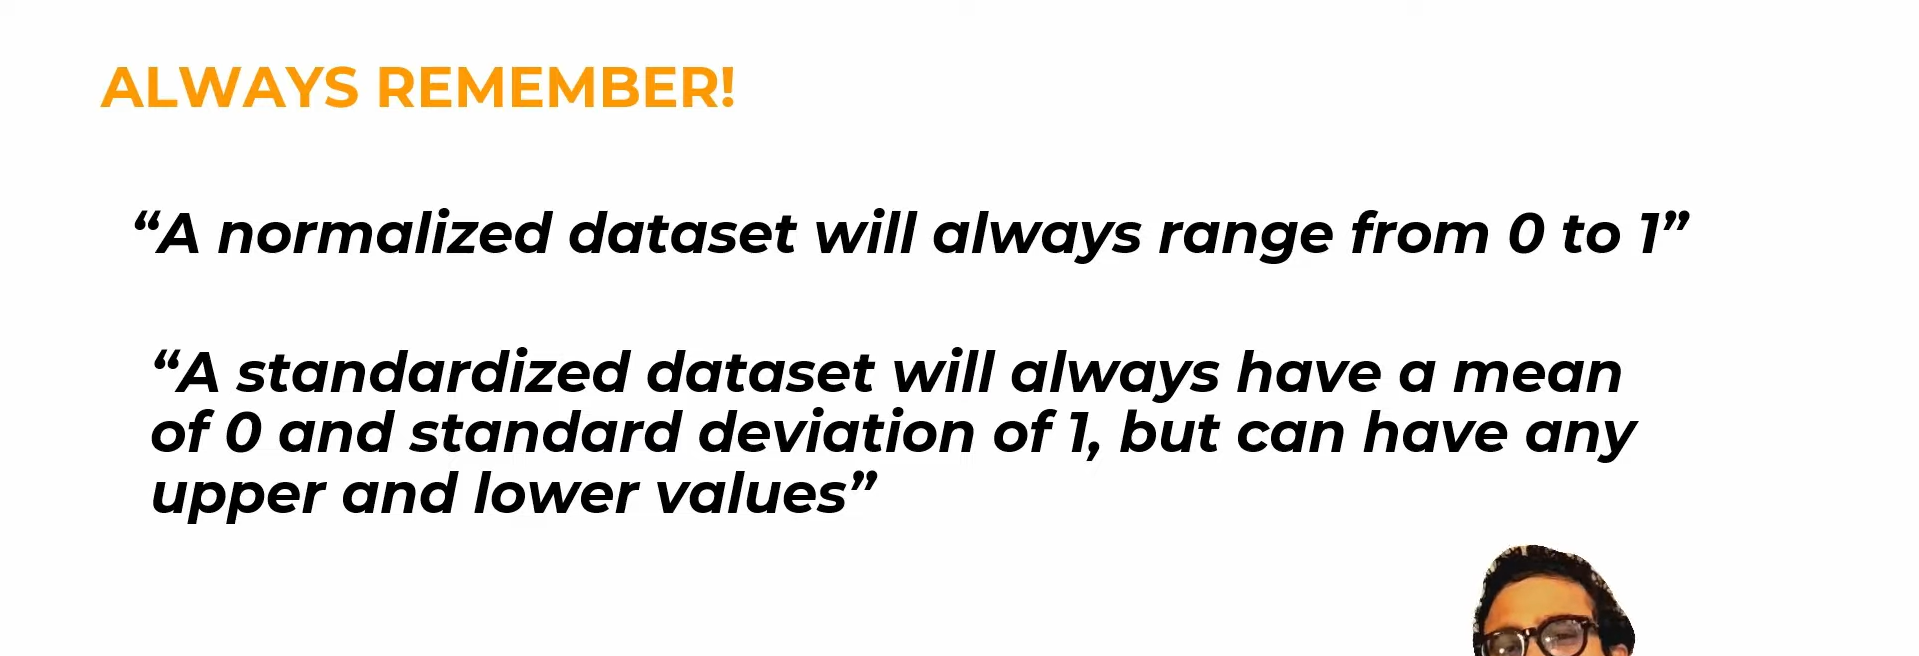


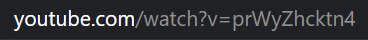

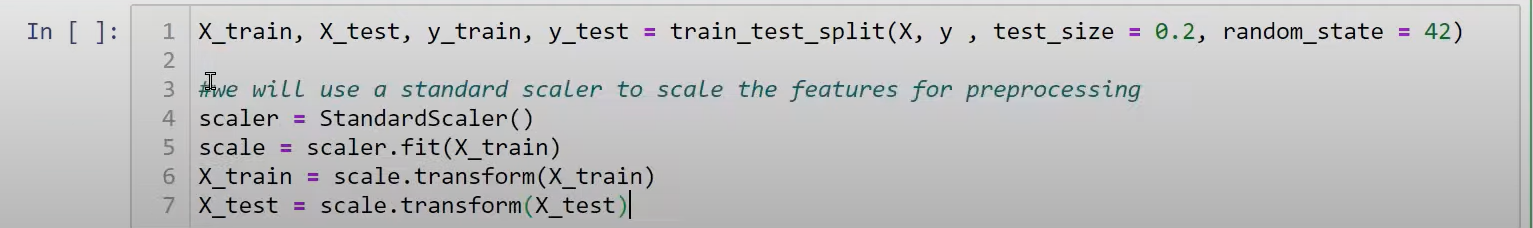

In [ ]:
# Scaling our model after making the split
scaler = StandardScaler()

# Only scaling the traning so we won't alter the results on our model
X_train = scaler.fit_transform(X_train) # Scaling and fitting (applying)
X_test = scaler.transform(X_test) 

### Showing the data in the correlation matrix, just to see how the features are correlating to the target variable:

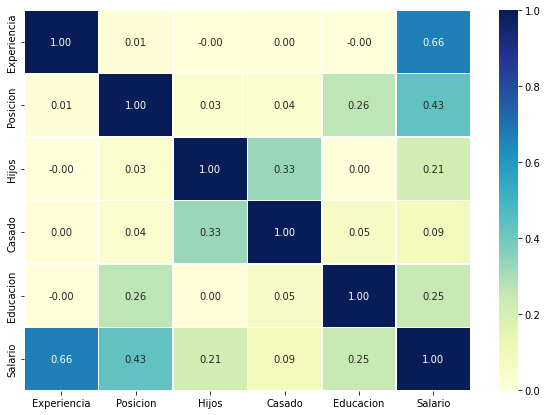

In [ ]:
fig, ax = plt.subplots(figsize=(10,7)) 
ax = sns.heatmap(data_hr.corr(), annot = True, linewidths = 0.5,  fmt = ".2f",  cmap = "YlGnBu"); 

### This gives us a better inside regarding the relation between the salary and the features:

  1. Experience represent a 66% of likelihood of earning a higher amount
  2. Position represent a 43% 
  3. If the person got offspring, it would represent 21%
  4. If married, it would be around 9%
  5. The level of education would represent a 25%


### Training, fitting the model and getting the prediction

In [ ]:
# Creating the object
regressor = LinearRegression()

# Training the model
regressor.fit(X_train, y_train)

# Getting the prediction
y_predict =  regressor.predict(X_test)

In [ ]:
# Checking the model's Score on the training set
print(f"The score is: {np.around(regressor.score(X_train, y_train), 4)*100}%")

The score is: 68.47%


In [ ]:
# Checking the model's Score on the testing set
print(f"The score is: {np.around(regressor.score(X_test, y_test), 4)*100}%")

The score is: 65.22%


### Accurecy: MSE, RMSE o R2.

In [ ]:
# RMSE - How big is the error. This is more relative to the variance, which means, it measures the spread between the values in the dataset.
RMSE = mean_squared_error(y_test, y_predict, squared=False)
# RMSE

In [ ]:
# R2 Coefficient of determination, which measures how the model is performing. If it is closed to 1, it is performing great. If not, then, 
# it is not a good model
R2 = r2_score(y_test, y_predict)
# R2

In [ ]:
print(f"The model got an square error of {np.around(RMSE*100, 2)}%, with an accurecy of {np.around(R2*100, 2)}%")

The model got an square error of 51.73%, with an accurecy of 65.22%


# SOLUTION SECOND PART:

### Importing data

In [ ]:
data_hr2 = pd.read_csv("/content/drive/MyDrive/MI_PERSONAL_PROJECT/ALBERTO_Proyecto_M3/Data/rrhh_2.csv")
data_hr2.head()

,Experiencia,Posicion,Hijos,Casado,Educacion,Salario,Contratado
0,0.5,Analista,4,1,Bachillerato,13540,1
1,5.6,Analista,2,0,Licenciatura,31240,0
2,11.7,Analista,1,0,Licenciatura,63880,0
3,5.2,Analista,2,1,Licenciatura,29960,1
4,7.2,Coordinador,2,1,Licenciatura,34710,1


### Exploring the data


In [ ]:
# Shape
data_hr2.shape

(1000, 7)

In [ ]:
# NaNs
data_hr2.isna().sum()

Experiencia    0
Posicion       0
Hijos          0
Casado         0
Educacion      0
Salario        0
Contratado     0
dtype: int64

### There's no NaNs reported but a couple of categorical values that we'll going to convert into numbers and standarized so we can run the model

In [ ]:
# Checking the dataframe again to get the categoricals
data_hr2.head(3)

,Experiencia,Posicion,Hijos,Casado,Educacion,Salario,Contratado
0,0.5,Analista,4,1,Bachillerato,13540,1
1,5.6,Analista,2,0,Licenciatura,31240,0
2,11.7,Analista,1,0,Licenciatura,63880,0


In [ ]:
# Checking how many values per categorical feature (Posicion, Educacion)
print(f"Exploring the categories, we got:\n\n1.'Posicion': {list(data_hr2['Posicion'].unique())}\n\n2.'Educacion': {list(data_hr2['Educacion'].unique())}\n\nThese are the values we are going to turn into numberical. \nSince they are categorical, I will use categorical transformetion\ninstead of the Dummy one.")

Exploring the categories, we got:

1.'Posicion': ['Analista', 'Coordinador', 'Gerente']

2.'Educacion': ['Bachillerato', 'Licenciatura', 'Posgrado']

These are the values we are going to turn into numberical. 
Since they are categorical, I will use categorical transformetion
instead of the Dummy one.


### Converting into dummy (we are using from sklearn.preprosessing import OrdinalEncoder, imported at the beginning) 

In [ ]:
# Creating the object
oencoder = OrdinalEncoder()

# Encoding
data_hr2[["Posicion", "Educacion"]] = oencoder.fit_transform(data_hr2[["Posicion", "Educacion"]])
data_hr2.head()

,Experiencia,Posicion,Hijos,Casado,Educacion,Salario,Contratado
0,0.5,0.0,4,1,0.0,13540,1
1,5.6,0.0,2,0,1.0,31240,0
2,11.7,0.0,1,0,1.0,63880,0
3,5.2,0.0,2,1,1.0,29960,1
4,7.2,1.0,2,1,1.0,34710,1


### Spliting the data

In [ ]:
# Getting X and y
X = data_hr2.drop(["Contratado"], axis = 1)
y = data_hr2["Contratado"]

# Dividing into training and testing
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"1. X1_train: {X1_train.shape}\n2. X1_test: {X1_test.shape}\n3. y1_train: {y1_train.shape}\n4. y1_test: {y1_test.shape}\n")

1. X1_train: (800, 6)
2. X1_test: (200, 6)
3. y1_train: (800,)
4. y1_test: (200,)



In [ ]:
# Scaling our model after making the split
scaler = StandardScaler()

# Only scaling the traning so we won't alter the results on our model
X1_train = scaler.fit_transform(X1_train) # Scaling and fitting (applying)
X1_test = scaler.transform(X1_test) # Applying the results on the test data X variable

### Training the model

In [ ]:
# Creating the object
clf = LogisticRegression() 

# Training the model
clf.fit(X1_train, y1_train)

# Getting the prediction
y1_pred = clf.predict(X1_test)

### Checking the accurecy of the model:

In [ ]:
# Using accurecy_score

score = accuracy_score(y1_test, y1_pred)
print(f"The model has an accurecy of {np.around(score*100, 4)}%")

The model has an accurecy of 71.0%


### Creating the confusion matrix:

In [ ]:
CM = confusion_matrix(y1_test, y1_pred)
CM

array([[66, 32],
       [26, 76]])

Heatmap of the CM:

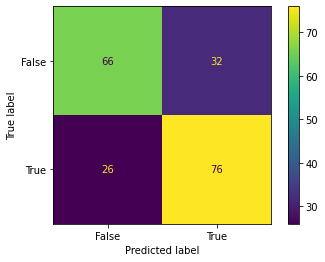

In [ ]:
# Creating the data to plot
CM_heat_map = ConfusionMatrixDisplay(confusion_matrix = CM, display_labels = [False,True])

# Plotting it
CM_heat_map.plot();

# INFORMATION:

### 1. RESCALAMIENTO:

El objetivo final de realizar la estandarización es reducir todas las características a una escala común sin distorsionar las diferencias en el rango de los valores.

https://forum.huawei.com/enterprise/es/diferencia-entre-fit-transform-y-transform-en-scikit-learn/thread/891275-100757#:~:text=StandardScaler()%20y%20se%20utilizan,Notas%3A&text=fit_transform()%20se%20utiliza%20en,de%20escalado%20de%20esos%20datos.


### 2. ¿POR QUÉ SE REALIZA UN AJUSTE POR RE-ESCALAMIENTO, NORMALIZACIÓN O ESTANDARIZACIÓN SOBRE LOS DATOS EN EL CONTEXTO DEL APRENDIZAJE AUTOMÁTICO?

https://marxistphilosophyofscience.com/2021/04/03/por-que-se-realiza-un-ajuste-por-re-escalamiento-normalizacion-o-estandarizacion-sobre-los-datos-en-el-contexto-del-aprendizaje-automatico/


### 3. PYTHON MACHINE LEARNING - TRAIN TEST SPLIT - SKLEARN:

https://www.youtube.com/watch?v=BUkqYGPnLZ8


### 4. PLOTTING WITH SEABORN:

https://seaborn.pydata.org/generated/seaborn.scatterplot.html



### 5. NORMALIZATION VS. STANDARDIZATION (FEATURE SCALING IN MACHINE LEARNING)

https://www.youtube.com/watch?v=bqhQ2LWBheQ



### 6. LINEAR REGRESSION ANALYSIS | LINEAR REGRESSION IN PYTHON | MACHINE LEARNING ALGORITHMS | SIMPLILEARN


https://www.youtube.com/watch?v=NUXdtN1W1FE



### 7. RANDOM STATE:  

It doesn't matter what the actual random_state number is 42, 0, 21, ... The important thing is that everytime you use 42, you will always get the same output the first time you make the split.

https://stackoverflow.com/questions/28064634/random-state-pseudo-random-number-in-scikit-learn


### 8. ANÁLISIS DE COMPONENTES PRINCIPALES Y REDUCCIÓN DE DIMENSIONALIDAD PRINCIPAL COMPONENT ANALYSIS PCA

https://www.youtube.com/watch?v=b1NGM3IbRcI


### 9. MACHINE LEARNING TUTORIAL PYTHON - 2: LINEAR REGRESSION SINGLE VARIABLE

https://www.youtube.com/watch?v=8jazNUpO3lQ


### 10. MACHINE LEARNING TUTORIAL PYTHON - 3: LINEAR REGRESSION MULTIPLE VARIABLES

https://www.youtube.com/watch?v=J_LnPL3Qg70



### 11. Housing price example:

https://www.geeksforgeeks.org/house-price-prediction-using-machine-learning-in-python/



### 12. MAE, MSE, RMSE, Coefficient of Determination, Adjusted R Squared — Which Metric is Better?

https://medium.com/analytics-vidhya/mae-mse-rmse-coefficient-of-determination-adjusted-r-squared-which-metric-is-better-cd0326a5697e


### 13. Las Mejores Métricas para Evaluar Modelos de Regresión con Scikit-Learn: R2, MSE, RMSE, MAE y otras

https://www.youtube.com/watch?v=9IZ6OPQWtpw


### 14. Confussion matrix: A confusion matrix is a table that is used to define the performance of a classification algorithm.

https://www.sciencedirect.com/topics/engineering/confusion-matrix#:~:text=A%20confusion%20matrix%20is%20a,performance%20of%20a%20classification%20algorithm.

https://www.youtube.com/watch?v=_CGTbkHwUHQ

### 15. Logistic regression

https://www.youtube.com/watch?v=XnOAdxOWXWg


### 16. Logistic regression vs Logistic regressionCV

https://towardsdatascience.com/scikit-learns-estimator-with-cross-validation-6bca3ce91676


### 17. Standarized model

https://www.statlect.com/fundamentals-of-statistics/linear-regression-with-standardized-variables

